# Criteo Dataset (Un-biased version)

### Data Dictionary

This dataset (2018) is constructed by assembling data resulting from several incrementality tests, a particular randomized trial procedure where a random part of the population is prevented from being targeted by advertising. 

It consists of 13,979,592 rows, each one representing a user with 11 features, a treatment indicator and 2 labels (visits and conversion)

Here is a detailed description of the fields (they are comma-separated in the file):

- f0, f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11: feature values (dense, float)
- treatment: treatment group (1 = treated, 0 = control)
- conversion: whether a conversion occured for this user (binary, label)
- visit: whether a visit occured for this user (binary, label)
- exposure: treatment effect, whether the user has been effectively exposed (binary)

### Import Python Modules

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import time
import numpy as np
import pandas as pd

In [2]:
!pip install dowhy
from dowhy import CausalModel



### Import dataset

In [3]:
df = pd.read_csv("criteo_data.csv.gz")
df.head()

f0         f1        f2        f3         f4        f5        f6  \
0  12.616365  10.059654  8.976429  4.679882  10.280525  4.115453  0.294443   
1  12.616365  10.059654  9.002689  4.679882  10.280525  4.115453  0.294443   
2  12.616365  10.059654  8.964775  4.679882  10.280525  4.115453  0.294443   
3  12.616365  10.059654  9.002801  4.679882  10.280525  4.115453  0.294443   
4  12.616365  10.059654  9.037999  4.679882  10.280525  4.115453  0.294443   

         f7        f8         f9       f10       f11  treatment  conversion  \
0  4.833815  3.955396  13.190056  5.300375 -0.168679          1           0   
1  4.833815  3.955396  13.190056  5.300375 -0.168679          1           0   
2  4.833815  3.955396  13.190056  5.300375 -0.168679          1           0   
3  4.833815  3.955396  13.190056  5.300375 -0.168679          1           0   
4  4.833815  3.955396  13.190056  5.300375 -0.168679          1           0   

   visit  exposure  
0      0         0  
1      0         0  
2      0         0  
3      0         0  
4      0         0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13979592 entries, 0 to 13979591
Data columns (total 16 columns):
 #   Column      Dtype  
---  ------      -----  
 0   f0          float64
 1   f1          float64
 2   f2          float64
 3   f3          float64
 4   f4          float64
 5   f5          float64
 6   f6          float64
 7   f7          float64
 8   f8          float64
 9   f9          float64
 10  f10         float64
 11  f11         float64
 12  treatment   int64  
 13  conversion  int64  
 14  visit       int64  
 15  exposure    int64  
dtypes: float64(12), int64(4)
memory usage: 1.7 GB


In [5]:
# Sample a subset of the data (e.g., 1% of the dataset)
sampled_df = df.sample(frac=0.01, random_state=1)  # Adjust the fraction as needed

# Select only numerical columns for the heatmap
numerical_df = sampled_df.select_dtypes(include='number')

# Display the first few rows of the sampled numerical dataframe
print(numerical_df.head())

                 f0         f1        f2        f3         f4        f5  \
13604834  19.488788  10.059654  8.214383  3.907662  10.280525  4.115453   
4263546   21.499191  10.059654  8.214383  4.679882  10.280525  4.115453   
7173543   22.250708  10.059654  8.214383  4.679882  10.280525  4.115453   
10525646  12.616365  10.059654  8.749045  4.679882  10.280525  4.115453   
3471949   24.304403  10.059654  8.860713  4.679882  10.280525  4.115453   

                f6        f7        f8         f9       f10       f11  \
13604834 -1.288207  4.833815  3.971858  13.190056  5.300375 -0.168679   
4263546  -2.411115  4.833815  3.971858  13.190056  5.300375 -0.168679   
7173543  -1.288207  4.833815  3.971858  13.190056  5.300375 -0.168679   
10525646  0.294443  4.833815  3.915574  13.190056  5.300375 -0.168679   
3471949  -6.699321  4.833815  3.892853  13.190056  5.300375 -0.168679   

          treatment  conversion  visit  exposure  
13604834          1           0      0         0  
4263546 

In [6]:
numerical_df['treatment'].value_counts()

treatment
1    118780
0     21016
Name: count, dtype: int64

In [7]:
numerical_df.describe()

f0             f1             f2             f3  \
count  139796.000000  139796.000000  139796.000000  139796.000000   
mean       19.637741      10.070182       8.446161       4.180403   
std         5.379755       0.105849       0.299320       1.338753   
min        12.616365      10.059654       8.214383      -6.709484   
25%        12.616365      10.059654       8.214383       4.679882   
50%        21.941762      10.059654       8.214383       4.679882   
75%        24.473555      10.059654       8.717426       4.679882   
max        26.745241      14.600700       9.051956       4.679882   

                  f4             f5             f6             f7  \
count  139796.000000  139796.000000  139796.000000  139796.000000   
mean       10.338426       4.025669      -4.153152       5.107981   
std         0.343862       0.443113       4.578640       1.218905   
min        10.280525      -7.493111     -25.548251       4.833815   
25%        10.280525       4.115453      -6.699321       4.833815   
50%        10.280525       4.115453      -2.411115       4.833815   
75%        10.280525       4.115453       0.294443       4.833815   
max        19.939568       4.115453       0.294443      11.998320   

                  f8             f9            f10            f11  \
count  139796.000000  139796.000000  139796.000000  139796.000000   
mean        3.933774      16.012329       5.333102      -0.170982   
std         0.056464       6.984840       0.167619       0.023097   
min         3.647797      13.190056       5.300375      -1.075337   
25%         3.910792      13.190056       5.300375      -0.168679   
50%         3.971858      13.190056       5.300375      -0.168679   
75%         3.971858      13.190056       5.300375      -0.168679   
max         3.971858      66.670216       6.473861      -0.168679   

           treatment     conversion          visit       exposure  
count  139796.000000  139796.000000  139796.000000  139796.000000  
mean        0.849667       0.002954       0.047197       0.030974  
std         0.357399       0.054273       0.212061       0.173247  
min         0.000000       0.000000       0.000000       0.000000  
25%         1.000000       0.000000       0.000000       0.000000  
50%         1.000000       0.000000       0.000000       0.000000  
75%         1.000000       0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000       1.000000

In [63]:
variable_names = numerical_df.columns.tolist()
print(variable_names)

['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'treatment', 'conversion', 'visit', 'exposure']


                 f0         f1        f2        f3         f4        f5  \
13604834  19.488788  10.059654  8.214383  3.907662  10.280525  4.115453   
4263546   21.499191  10.059654  8.214383  4.679882  10.280525  4.115453   
7173543   22.250708  10.059654  8.214383  4.679882  10.280525  4.115453   
10525646  12.616365  10.059654  8.749045  4.679882  10.280525  4.115453   
3471949   24.304403  10.059654  8.860713  4.679882  10.280525  4.115453   

                f6        f7        f8         f9       f10       f11  \
13604834 -1.288207  4.833815  3.971858  13.190056  5.300375 -0.168679   
4263546  -2.411115  4.833815  3.971858  13.190056  5.300375 -0.168679   
7173543  -1.288207  4.833815  3.971858  13.190056  5.300375 -0.168679   
10525646  0.294443  4.833815  3.915574  13.190056  5.300375 -0.168679   
3471949  -6.699321  4.833815  3.892853  13.190056  5.300375 -0.168679   

          treatment  conversion  visit  exposure  
13604834          1           0      0         0  
4263546 

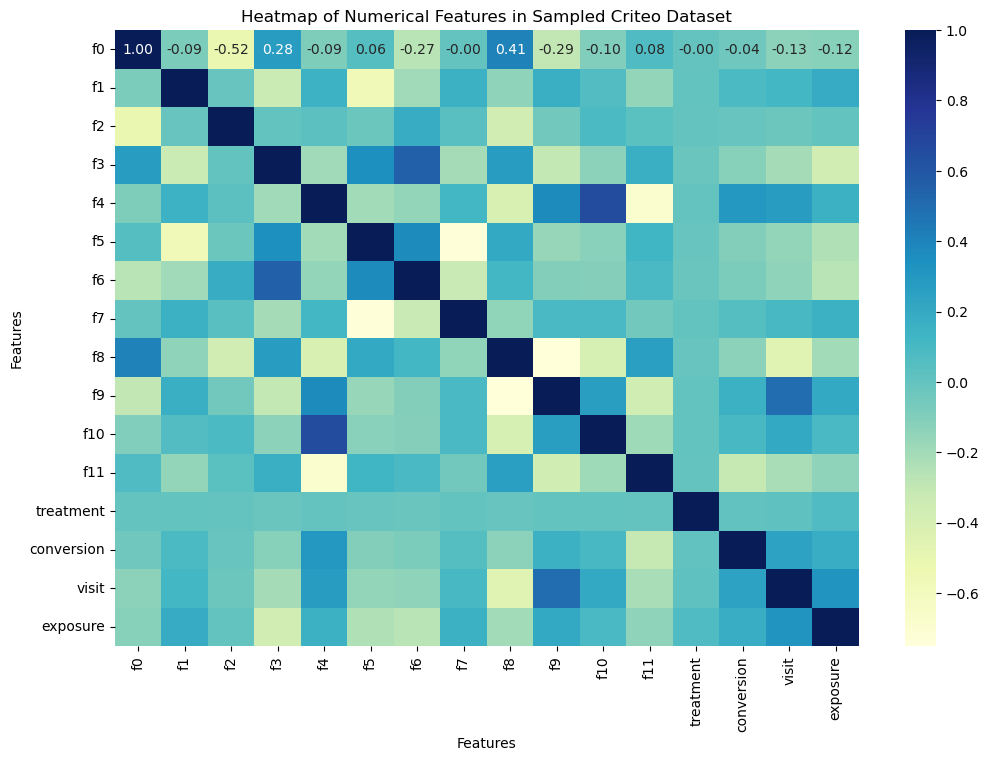

Time taken to process and display the heatmap: 0.50 seconds


In [8]:
# Start the timer
start_time = time.time()
# Sample a subset of the data (e.g., 1% of the dataset)
sampled_df = df.sample(frac=0.01, random_state=1)  # Adjust the fraction as needed

# Select only numerical columns for the heatmap
numerical_df = sampled_df.select_dtypes(include='number')

# Display the first few rows of the sampled numerical dataframe
print(numerical_df.head())

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='YlGnBu', fmt=".2f")

# Customize the heatmap
plt.title('Heatmap of Numerical Features in Sampled Criteo Dataset')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

# End the timer
end_time = time.time()

# Calculate and print the elapsed time
elapsed_time = end_time - start_time
print(f"Time taken to process and display the heatmap: {elapsed_time:.2f} seconds")

In [9]:
numerical_df.corr()

correlation_matrix = numerical_df.corr()


In [10]:
correlation_matrix.to_csv("correlation_matrix.csv")

### Initial Causal Estimate of ATE from RCT

In [11]:
# Full data Estimate ATE from an RCT
ate_full = df[df['treatment'] == 1]['conversion'].mean() - df[df['treatment'] == 0]['conversion'].mean()
print(f"Estimated ATE: {ate_full}")

Estimated ATE: 0.0011518730521316279


In [12]:
# Sample Data Estimate ATE from an RCT
ate_sample = sampled_df[sampled_df['treatment'] == 1]['conversion'].mean() - sampled_df[sampled_df['treatment'] == 0]['conversion'].mean()
print(f"Estimated ATE: {ate_sample}")

Estimated ATE: 0.0014049526998664828


### Step 1:  to Create a Causal Model



**Define Variables:**

- Treatment: What is the intervention or variable that is being manipulated in the experiments?
            treatment.

- Outcome: What is the primary outcome or effect you are interested in measuring? conversion (whether a conversion occurred).
    
- Common Causes: What variables could influence both the treatment and the outcome?  These might include the feature values f0 to f11 and potentially visit.

- Instruments:Are there variables related to the treatment but not directly to the outcome, which can be used for instrumental variable analysis? In this dataset, exposure could be considered an instrument if it meets the criteria (not affecting the outcome directly but related to treatment).


**Convert a Correlation Heatmap to a Causal Graph**

1. Generate and Interpret the Heatmap
- Identify correlation between (outcome) conversion and Effect) treatment=1 (
- Identify which features highly correlate with (outcome)  conversion and Effect) treatment=1



2. Construct the Causal Graph:

- Hypothesize Causal Relationships. Based on the heatmap, suppose you identify strong correlations between the following pairs:

- X1 and Y
X2 and Y
X1 and X2
From domain knowledge, you hypothesize:

- X1 causes Y
X2 causes Y
X1 causes X2

- Use using ChatGpt to transform correlations into a coded digraph



**Generate and Interpret the Heatmap** 

Correlation with Conversion:
conversion     1.000000
f4             0.301196
visit          0.244575
exposure       0.175897
f9             0.157076
f10            0.102397
f1             0.089308
f7             0.054979
treatment_1    0.009252
treatment      0.009252
f2            -0.011861
f0            -0.038421
f6            -0.081648
f5            -0.103554
f3            -0.117207
f8            -0.131703
f11           -0.309517
Name: conversion, dtype: float64

Correlation with Treatment=1:
treatment_1    1.000000
treatment      1.000000
exposure       0.075202
visit          0.015564
conversion     0.009252
f7             0.007899
f9             0.007487
f1             0.004495
f10            0.001905
f4             0.000549
f2            -0.000885
f0            -0.001200
f11           -0.001375
f8            -0.008910
f5            -0.009409
f6            -0.013288
f3            -0.014508
Name: treatment_1, dtype: float64


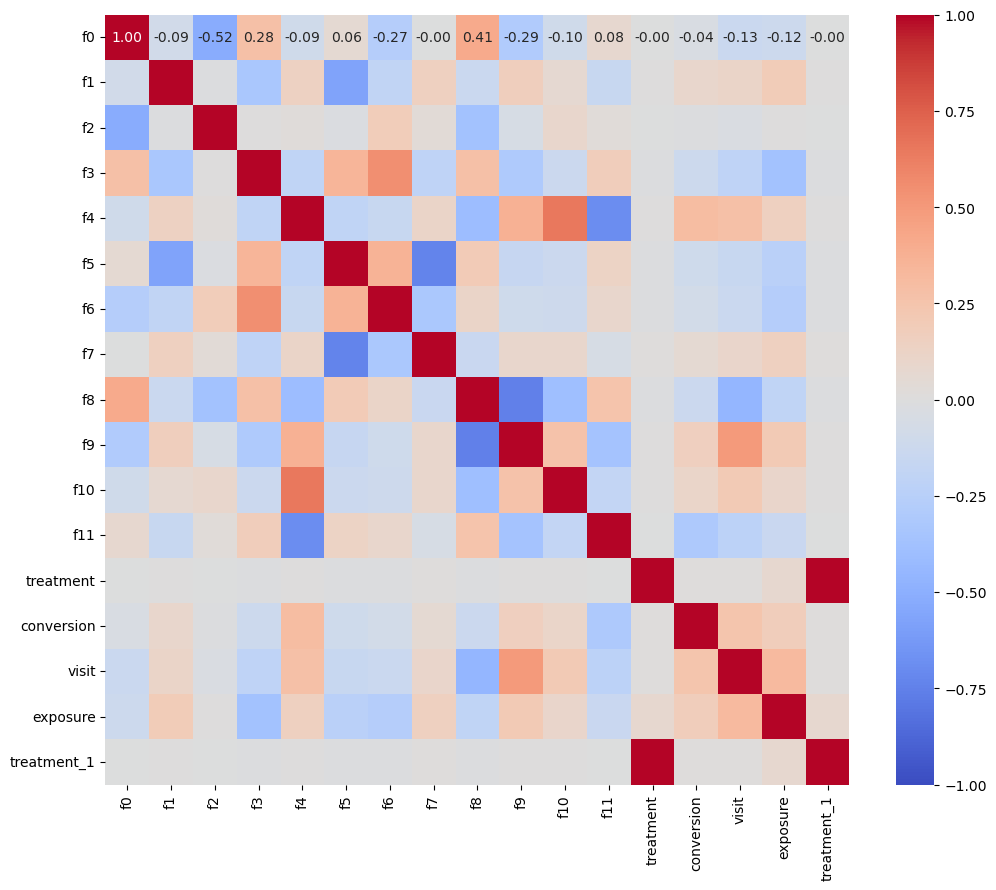

In [13]:
import pandas as pd

# Ensure that 'treatment' and 'conversion' are in the DataFrame
if 'treatment' not in df.columns or 'conversion' not in df.columns:
    raise ValueError("The dataset must contain 'treatment' and 'conversion' columns")

# Sample a subset of the data (e.g., 1% of the dataset)
sampled_df = df.sample(frac=0.01, random_state=1)  # Adjust the fraction as needed

# Add a new column for treatment=1 if it doesn't exist
sampled_df['treatment_1'] = (sampled_df['treatment'] == 1).astype(int)

# Calculate the correlation matrix
correlation_matrix = sampled_df.corr()

# Extract correlation values for 'conversion' and 'treatment_1'
conversion_corr = correlation_matrix['conversion']
treatment_corr = correlation_matrix['treatment_1']

# Display the correlations
print("Correlation with Conversion:")
print(conversion_corr.sort_values(ascending=False))

print("\nCorrelation with Treatment=1:")
print(treatment_corr.sort_values(ascending=False))

# Plot the heatmap for the entire correlation matrix if needed
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.show()


**Construct the Causal Graph**

In [14]:
dot_graph = """
digraph {
    U[label="Unobserved Confounders"];
    U -> treatment;
    U -> conversion;
    f4 -> conversion;
    visit -> conversion;
    exposure -> conversion;
    f9 -> conversion;
    f10 -> conversion;
    f1 -> conversion;
    f7 -> conversion;
    exposure -> treatment;
    visit -> treatment;
    treatment -> conversion;
    f7 -> treatment;
    f9 -> treatment;
    f1 -> treatment;
    f10 -> treatment;
    f4 -> treatment;
}
"""


In [15]:
# Define the causal model
model = CausalModel(
    data=sampled_df,
    treatment='treatment',
    outcome='conversion',
    graph=dot_graph
)

/Users/paulfagan/anaconda3/lib/python3.11/site-packages/dowhy/causal_model.py:582: UserWarning: 1 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.
  warnings.warn(


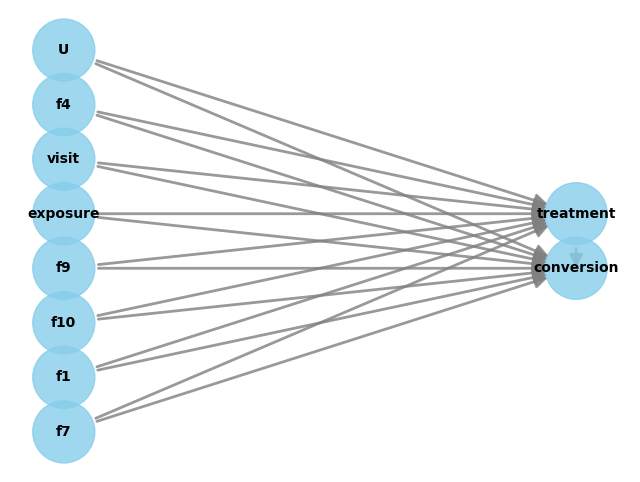

In [16]:
model.view_model()

### Step2:  Identification

In [17]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
No such variable(s) found!

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



### Step2:  Estimation

In [18]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification")
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

Estimation failed! No relevant identified estimand available for this estimation method.
Causal Estimate is None


Experiment

In [47]:
sampled_df = df.sample(frac=0.01, random_state=1)  # Adjust the fraction as needed

data = sampled_df.to_numpy()


In [34]:
!pip install causal-learn

In [43]:
from causallearn.search.ConstraintBased.PC import pc


  0%|          | 0/16 [00:00<?, ?it/s]

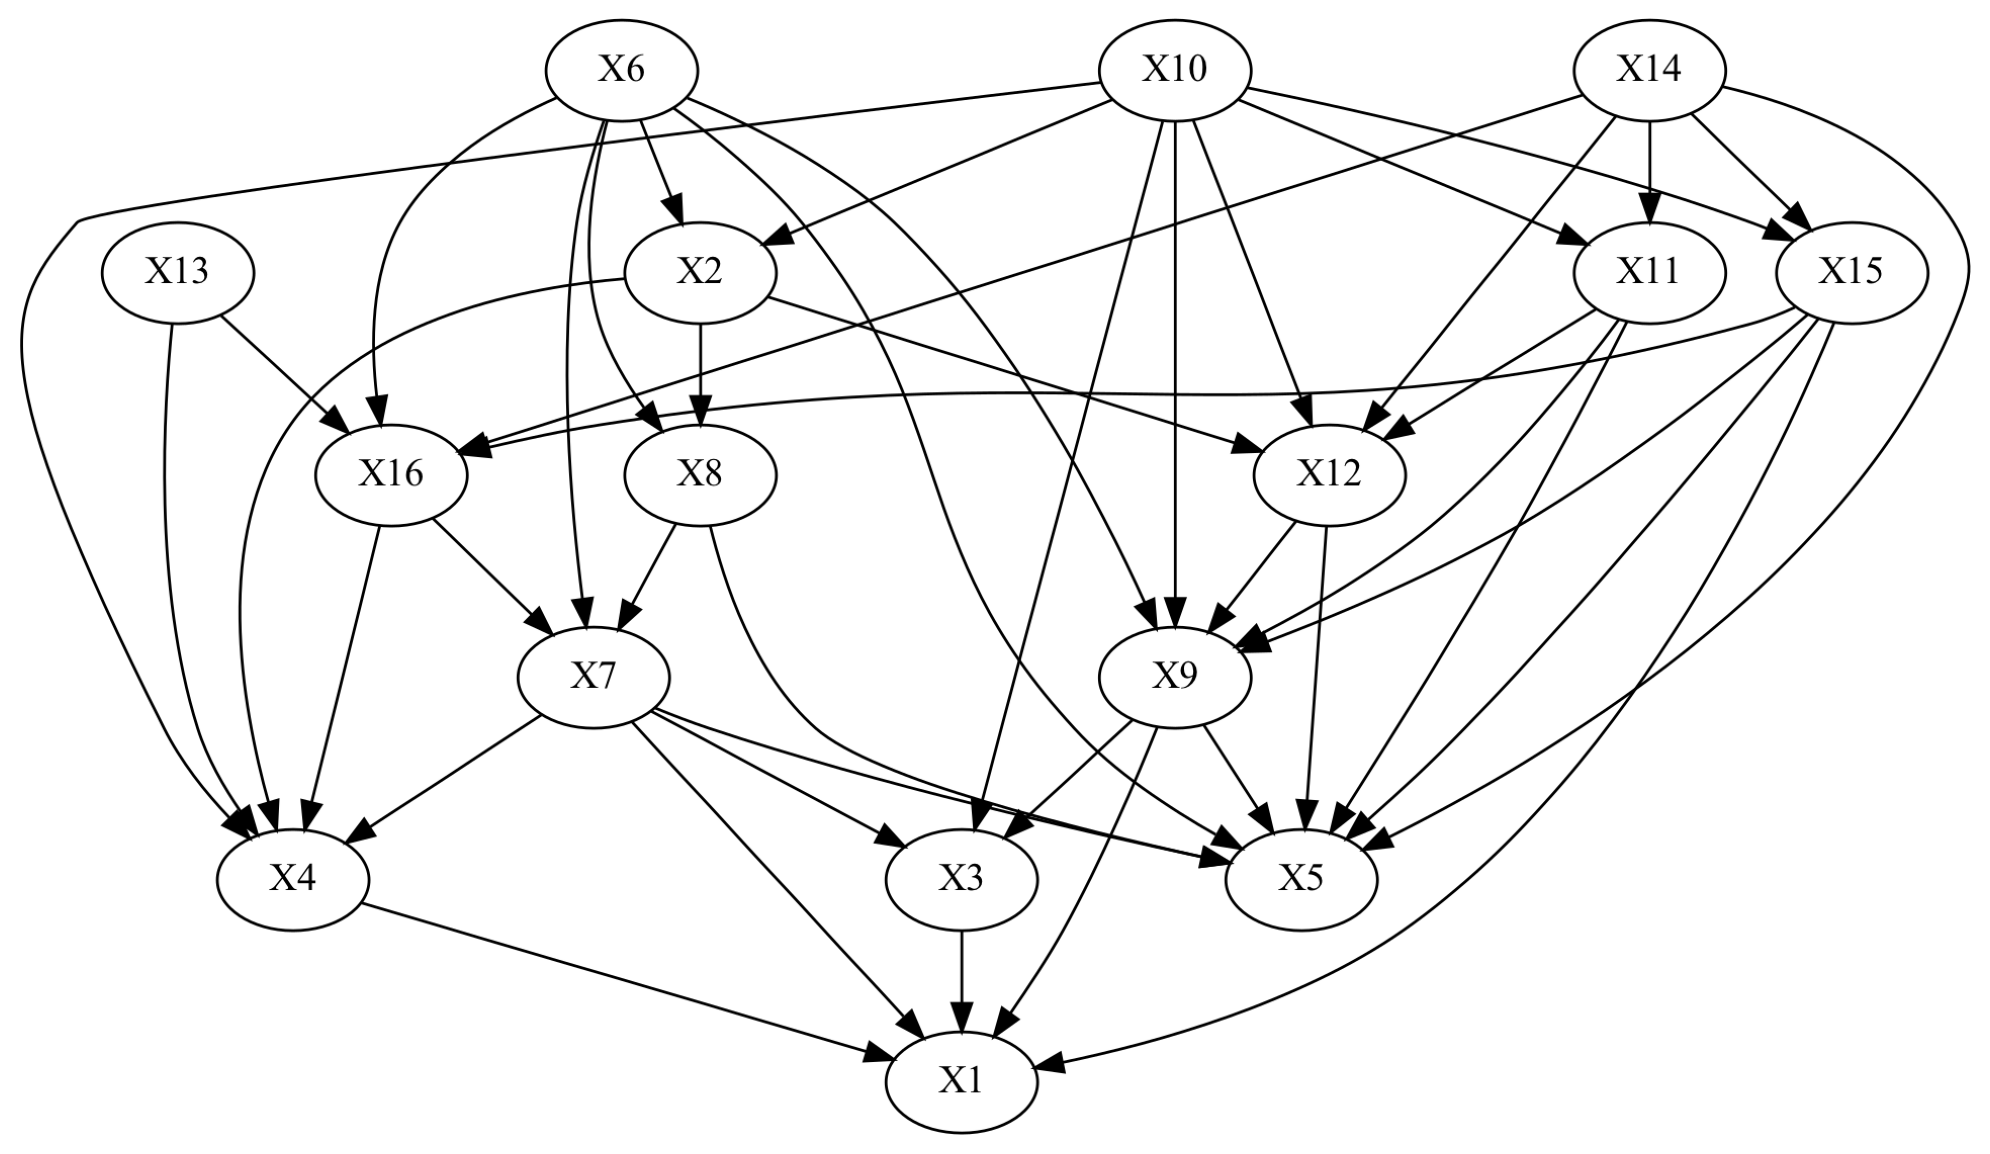

In [48]:

# default parameters
cg = pc(data)

# visualization using pydot
cg.draw_pydot_graph()



  0%|          | 0/16 [00:00<?, ?it/s]

X1 --> X7
X2 --> X4
X6 --> X2
X2 --> X8
X2 --> X12
X3 --> X9
X16 --> X4
X5 --> X6
X8 --> X5
X5 --> X14
X6 --> X7
X6 --> X16
X16 --> X7
X10 --> X9
X9 --> X11
X15 --> X9
X10 --> X12
X15 --> X16
Relabeling node 0 to f0
Relabeling node 0 to f0
Relabeling node 1 to f1
Relabeling node 1 to f1
Relabeling node 2 to f2
Relabeling node 2 to f2
Relabeling node 3 to f3
Relabeling node 3 to f3
Relabeling node 4 to f4
Relabeling node 4 to f4
Relabeling node 5 to f5
Relabeling node 5 to f5
Relabeling node 6 to f6
Relabeling node 6 to f6
Relabeling node 7 to f7
Relabeling node 7 to f7
Relabeling node 8 to f8
Relabeling node 8 to f8
Relabeling node 9 to f9
Relabeling node 9 to f9
Relabeling node 10 to f10
Relabeling node 10 to f10
Relabeling node 11 to f11
Relabeling node 11 to f11
Relabeling node 12 to treatment
Relabeling node 12 to treatment
Relabeling node 13 to conversion
Relabeling node 13 to conversion
Relabeling node 14 to visit
Relabeling node 14 to visit
Relabeling node 15 to exposure
Relabel

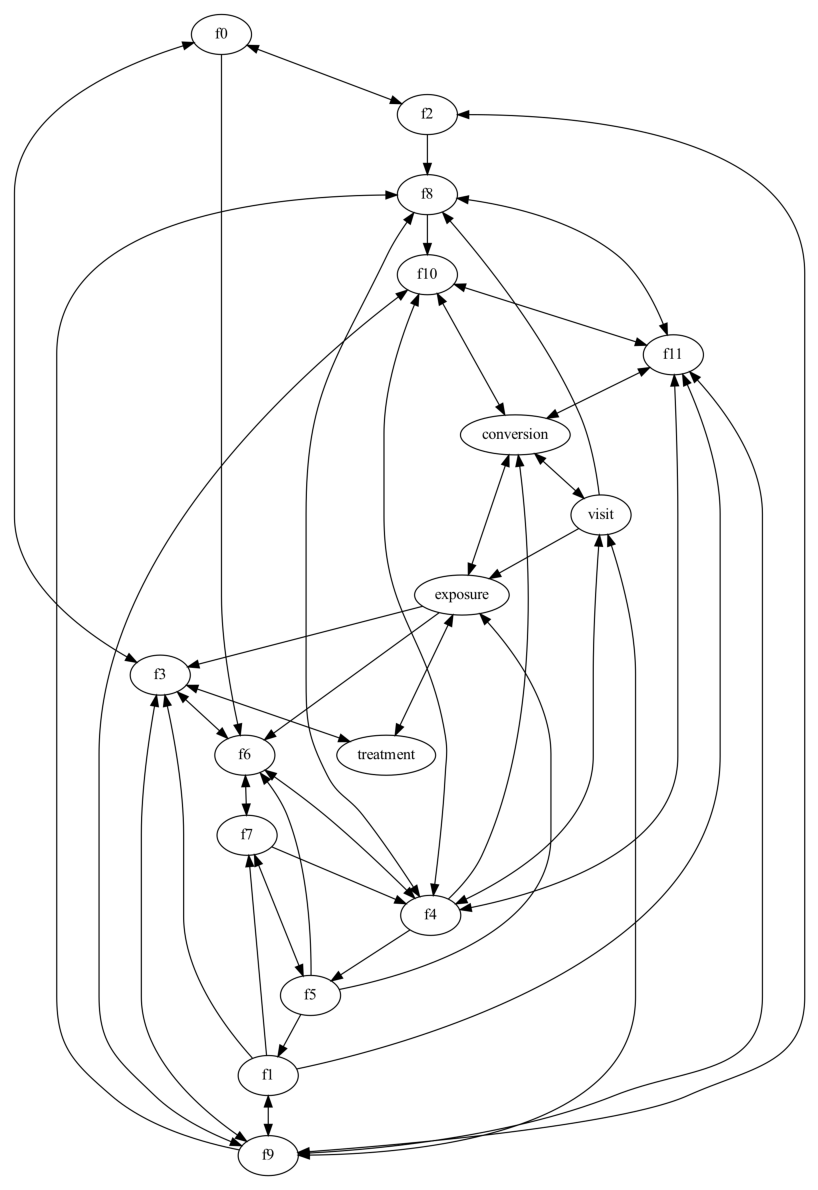

In [68]:
from causallearn.search.ConstraintBased.FCI import fci

# default parameters
g, edges = fci(data)

# Create a mapping of original variable names to nodes
variable_names = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'treatment', 'conversion', 'visit', 'exposure']
node_labels = {i: name for i, name in enumerate(variable_names)}

# Function to relabel nodes in the pydot graph
def relabel_nodes(pydot_graph, node_labels):
    for node in pydot_graph.get_nodes():
        label = node.get_name().strip('"')
        if label.isdigit():
            new_label = node_labels[int(label)]
            print(f"Relabeling node {label} to {new_label}")  # Debugging print statement
            node.set_label(new_label)

# Visualization
pdy = GraphUtils.to_pydot(g)

# Relabel the nodes
relabel_nodes(pdy, node_labels)

# Ensure labels are correctly set by printing nodes
for node in pdy.get_nodes():
    print(node.to_string())  # Debugging print statement to check node labels

# Save the graph as an image
pdy.write_png('simple_test.png')

# Display the graph image in a Jupyter notebook
img = mpimg.imread('simple_test.png')
imgplot = plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

AttributeError: 'GeneralGraph' object has no attribute 'edges'

In [56]:
dot_graph_FCI = """
digraph {
    X1 -> X7;
    X2 -> X4;
    X6 -> X2;
    X2 -> X8;
    X2 -> X12;
    X3 -> X9;
    X16 -> X4;
    X5 -> X6;
    X8 -> X5;
    X5 -> X14;
    X6 -> X7;
    X6 -> X16;
    X16 -> X7;
    X10 -> X9;
    X9 -> X11;
    X15 -> X9;
    X10 -> X12;
    X15 -> X16;
}
"""

In [73]:
# Define the causal model
model_FCI = CausalModel(
    data=sampled_df,
    treatment='treatment',
    outcome='conversion',
    graph=dot_graph_FCI
)

In [74]:
identified_estimand = model_FCI.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

NodeNotFound: Either source treatment or target conversion is not in G